# Copula Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
rho = 0.3
Z2 = np.random.normal(size=(1000,2))
Z2[:,1] = Z2 @ np.array([rho, np.sqrt(1-rho**2)])

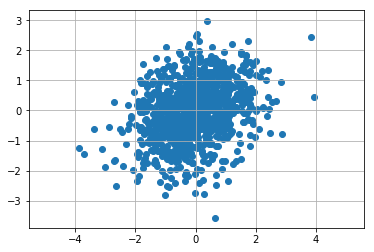

In [3]:
# Plot on the domain of normal distribution [-infty, infty]
plt.scatter(Z2[:,0], Z2[:,1])
plt.axis('equal')
plt.grid()
plt.show()

In [4]:
Z2

array([[ 1.59219408,  1.52179969],
       [-0.48414819,  0.25906514],
       [-0.52815253, -1.39035709],
       ...,
       [-0.32184213,  0.02130107],
       [-1.83201983,  1.01525557],
       [ 0.35755762,  0.27180064]])

In [5]:
U2 = ss.norm.cdf(Z2)
U2

array([[0.94432945, 0.93597036],
       [0.31414035, 0.60220751],
       [0.29869674, 0.08221023],
       ...,
       [0.37378615, 0.50849726],
       [0.03347423, 0.84500799],
       [0.6396628 , 0.60711234]])

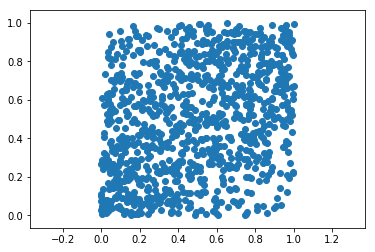

In [6]:
# Plot on the domain of uniform distribution [0,1]
plt.scatter(U2[:,0], U2[:,1])
plt.axis('equal')
plt.show()

In [7]:
# Now use the joint pair (U1, U2) pair to the default rate
lam = 1
default = -np.log(U2)/lam

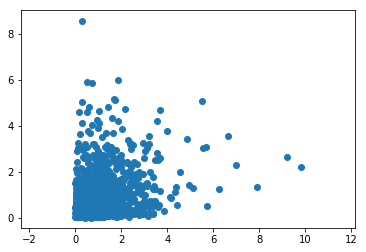

In [8]:
plt.scatter(default[:,0], default[:,1])
plt.axis('equal')
plt.show()

## We create a Gaussian copula function

In [9]:
def CopulaGaussian(n_var=2, n_sample=1000, rho=0.0):
    corr_mat = np.eye(n_var)*(1-rho) + rho
    chol_mat = np.linalg.cholesky(corr_mat)
    Z = np.random.normal(size=(n_sample, n_var)) @ chol_mat.transpose()
    U = ss.norm.cdf(Z)
    return U

In [10]:
U2 = CopulaGaussian(rho=0.9)

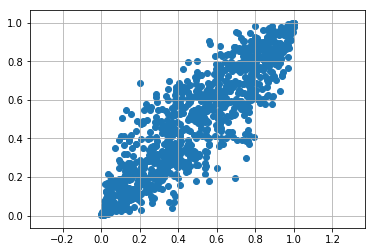

In [11]:
# Test the code
plt.scatter(U2[:,0], U2[:,1])
plt.axis('equal')
plt.grid()
plt.show()

# Simple CDO demo

##### * Assume that the individual loans have the default rate of $\lambda$=0.3 (30% of loans default every year)
* Let's package 10 (possibly sub-prime) loans into our CDO
* Create gaussian copula with rho = 0.5 vs 0.9
* Assume the maturity of our CDO is 1 year. 
* Assume the senior tranche is the bottom 50% of the loan (i.e. not affected by the first 50% loss)

In [12]:
# Gaussian copula 
lam = 0.3
n_sample=10000
U2 = CopulaGaussian(n_var=10, n_sample=n_sample, rho=0.5)

# Generate RNs for the default time
default_time = -np.log(U2)/lam
default_time

array([[16.8265724 ,  9.76623885, 17.66301376, ...,  8.89660996,
         6.47973977,  7.80153128],
       [ 2.8248364 ,  3.75699969,  6.45999086, ...,  3.63478076,
         6.04533249,  2.05334037],
       [ 2.3053031 ,  0.29453955,  1.56545082, ...,  0.84042487,
         2.46103166,  0.63350307],
       ...,
       [ 0.22286588,  1.28308838,  2.04540966, ...,  5.46392198,
         0.41422833,  1.49793541],
       [ 4.16971325,  1.35655807,  0.63269186, ...,  0.63187356,
         0.48953583,  1.66380559],
       [ 0.22276081,  0.21779595,  0.09807666, ...,  1.35791715,
         1.54947368,  0.75666545]])

In [13]:
# Check that the average default time of the individual loans are around 5 years
print( np.mean(default_time, axis=0) )

[3.30845936 3.30129667 3.29680619 3.33895585 3.32150358 3.30162202
 3.32299832 3.27844156 3.28744997 3.27205911]


In [14]:
# Compute the default ratio for the individual loans within 1 year
# it should be about 20%. Exactly 1-exp(-0.2)
print( "Exact default rate < 1yr:", 1 - np.exp(-lam) )
print( np.sum(default_time < 1.0, axis=0) / n_sample )

Exact default rate < 1yr: 0.2591817793182821
[0.2603 0.2617 0.2632 0.2543 0.2604 0.2657 0.2607 0.2648 0.2624 0.2614]


In [15]:
# Expected of individual loan
(1 - np.sum(default_time < 1.0, axis=0) / n_sample)*100

array([73.97, 73.83, 73.68, 74.57, 73.96, 73.43, 73.93, 73.52, 73.76,
       73.86])

In [16]:
# Count the total defaults in the pool within 1 year
default_total_loan = np.sum(default_time < 1.0, axis=1)
print( default_total )

NameError: name 'default_total' is not defined

In [ ]:
# Compute the percentage of the total default bigger than 4
# This is the probability of the senior tranche having any loss
sum(default_total_loan > 5)/n_sample

In [ ]:
# We can also compute the expected price of senior tranche (out of 100)
np.mean(np.fmin(10-default_total_loan,5))/5.0 * 100

## When the correlation is high, the default rate of the senior tranche CDO is just as bad as the individual loans (sub-prime)